In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 8})

In [75]:
# Load the class output files in outs.zip (must unzip before)
runs = []
n_vars = 11
for i in range(6*n_vars):
    if i<10:
        runs.append("0" + str(i))
    else:
        runs.append(str(i))

data_bg = []
data_cl = []
data_pk = []
for i in range(len(runs)):
    data_bg.append(np.loadtxt("outs/default" + runs[i] + "_background.dat").T)
    data_cl.append(np.loadtxt("outs/default" + runs[i] + "_cl.dat").T)
    data_pk.append(np.loadtxt("outs/default" + runs[i] + "_pk.dat").T)

data_bg = pd.Series(data_bg)
data_cl = pd.Series(data_cl)
data_pk = pd.Series(data_pk)

In [64]:
for i in range(len(data_bg)):
    for j in range(len(data_bg[i])):
        if(len(data_bg[i][j]) != 3000):
            print(len(data_bg[i][j]))

In [12]:
# Parameters names and Planck colaboration values
params_str = [r"$\Omega_b h^2$", r"$\Omega_{\textrm{CDM}} h^2$", r"$h$", r"$\tau$", r"$\textrm{ln}\left(10^{10}A_s\right)$", r"$n_s$"]
params = [0.02236,  0.1202, 0.6727, 0.0544, 3.045, 0.9649]

# Multipliers on runs
mults = np.array([0.5 + i*(1/(n_vars-1))for i in range(n_vars)])

In [125]:
cNorm = colors.Normalize(vmin=0.5, vmax=1.5)
cm = plt.get_cmap('coolwarm')
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

def nofunc(x):
    return x

def param_vars_plots(data, x_index, y_index, f_on_y=nofunc, xlabel=False, ylabel=False, xlog=False, ylog=False, ylims=False, xlims=False, cbar_coords=[0,0]):
    fig, ax = plt.subplots(3, 2, figsize=(8,7), dpi=150, sharex = True, sharey = True)
    
    cb = np.zeros_like(ax)
    cbax = np.zeros_like(ax)

    for no_param in range(len(params)):
        col = no_param % 2 
        row = int(no_param/2)
        for i in range(n_vars*no_param,n_vars*(no_param+1)):
            ax[row][col].plot(data[i][x_index],f_on_y(data[i][y_index]),color = scalarMap.to_rgba(mults[i-n_vars*no_param]))

    if(xlog):
        ax[0,0].set_xscale("log")
    if(ylog):
        ax[0,0].set_yscale("log")
    if(xlims != False):
        ax[0,0].set_xlim(xlims[0],xlims[1])
    if(ylims != False):
        ax[0,0].set_ylim(ylims[0],ylims[1])
    
    ax[0,0].set_ylabel(ylabel, fontsize=10)
    ax[1,0].set_ylabel(ylabel, fontsize=10)
    ax[2,0].set_ylabel(ylabel, fontsize=10)
    ax[2,0].set_xlabel(xlabel, fontsize=12)
    ax[2,1].set_xlabel(xlabel, fontsize=12)

    plt.tight_layout()

    for no_param in range(len(params)):
        col = no_param % 2 
        row = int(no_param/2)

        cbax[row][col] = inset_axes(ax[row][col], width="20%", height="5%", loc=2,bbox_to_anchor=(123+558*col+cbar_coords[0],800-327*row-cbar_coords[1],500,200)) 
        cb[row][col] = matplotlib.colorbar.ColorbarBase(cbax[row][col],cmap=cm, norm=cNorm, orientation='horizontal',ticks=[0.5, 1.0, 1.5])
        cbax[row][col].set_title(params_str[no_param], fontsize = 8)
        cb[row][col].ax.set_xticklabels((np.array([0.5, 1.0, 1.5])*params[no_param]*1000).astype(int)/1000,fontsize = 6)
    
    
    

# CMB power spectrum

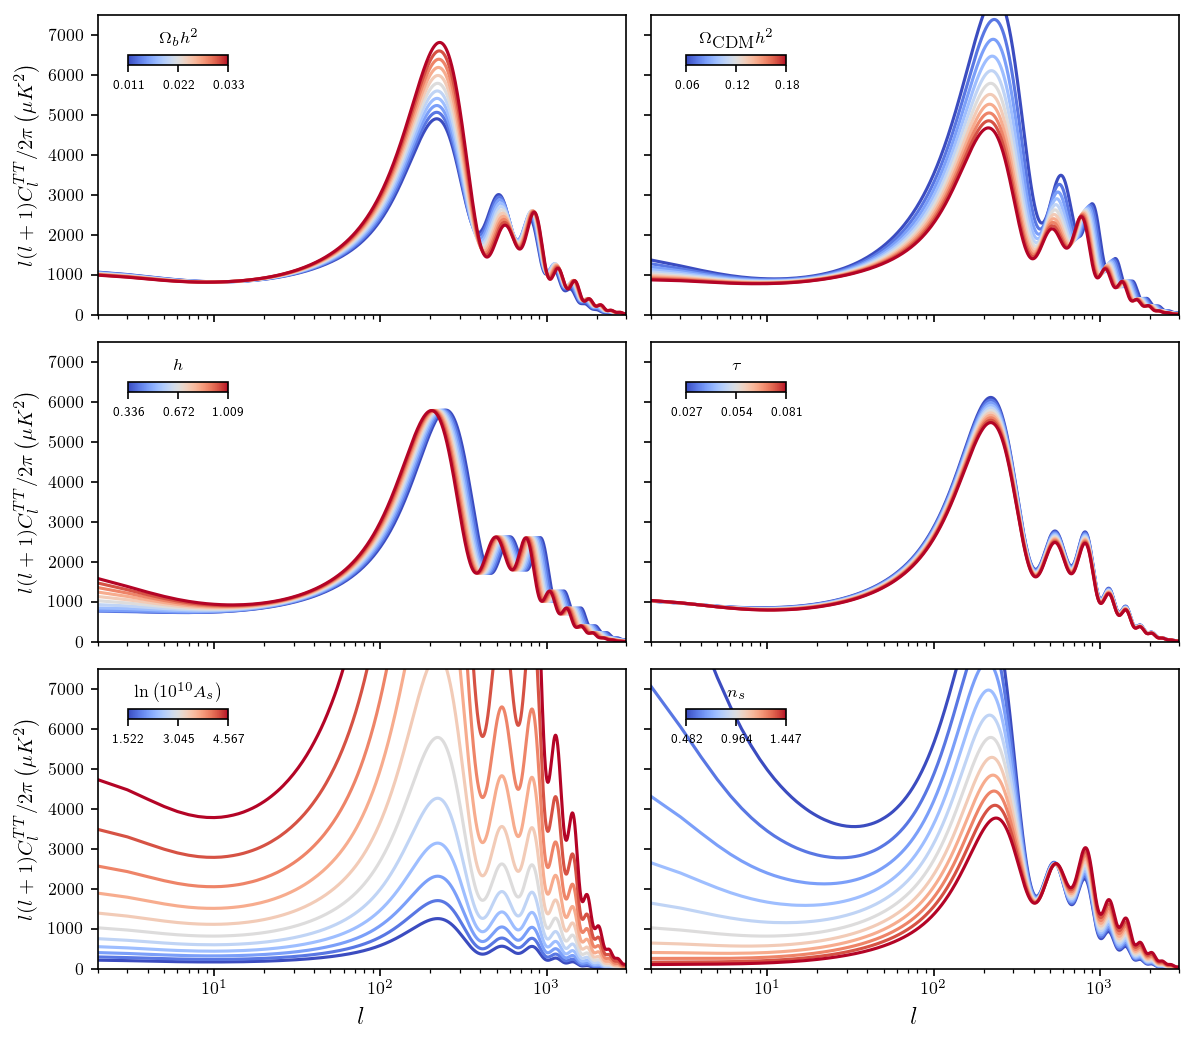

In [126]:
def func_cl(x):
    return 0.75 * 10e12 * x

param_vars_plots(data_cl, 0, 1, func_cl, 
                 xlabel = r"$l$", 
                 ylabel = r"$l(l+1)C^{TT}_l/2\pi \left(\mu K^2\right)$",
                 xlog = True,
                 xlims = [2e0,3e3],
                 ylims = [0,7.5e3])

Text(0.5, 0, '$l$')

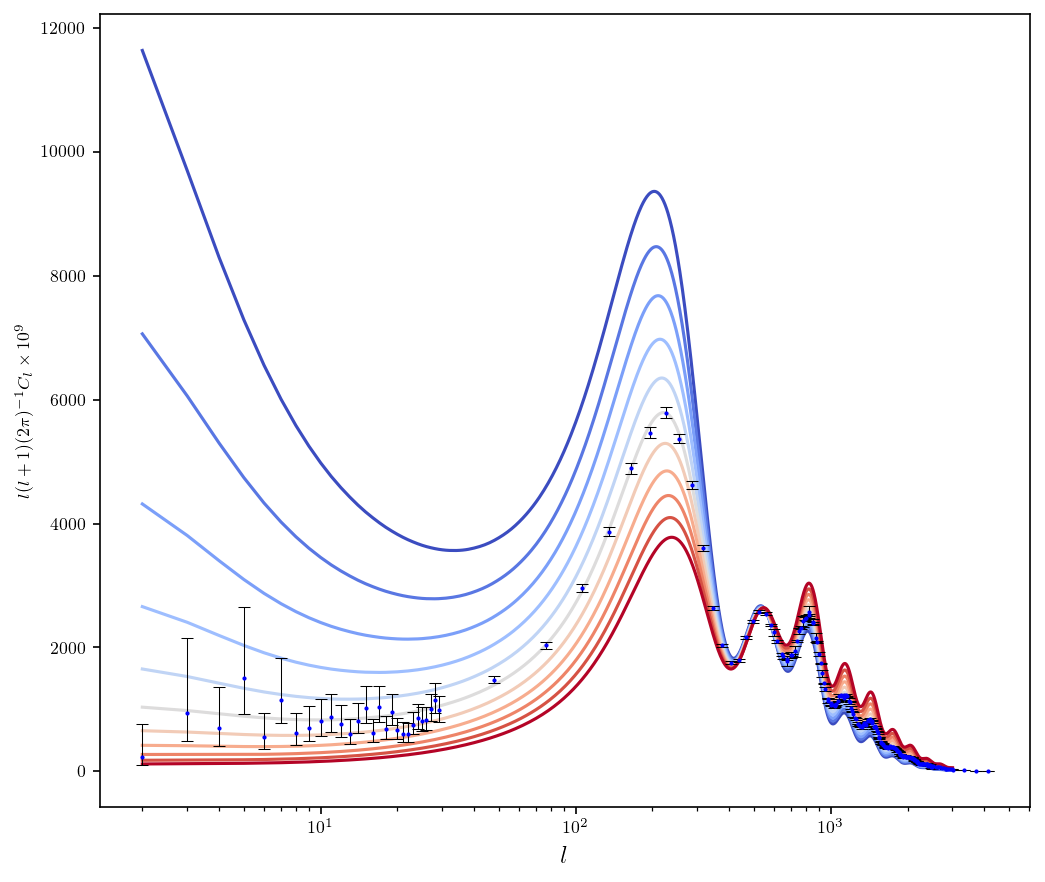

In [127]:
df_cmbps = pd.read_csv("expTT.csv")
l_exp = np.array(df_cmbps["l_center"])
power_exp = np.array(df_cmbps["Power"])
sigma_plus_exp = np.array(df_cmbps["Sigma_plus"])
sigma_minus_exp = np.array(df_cmbps["Sigma_minus"])

fig, ax = plt.subplots(figsize=(8,7), dpi=150)

no_param = 5
for i in range(n_vars*no_param,n_vars*(no_param+1)):
    ax.plot(data_cl[i][0],0.75*10e12*data_cl[i][1],color = scalarMap.to_rgba(mults[i-n_vars*no_param]))

ax.errorbar(l_exp,power_exp,yerr=[sigma_minus_exp, sigma_plus_exp],fmt='.',elinewidth=0.5,capthick=0.5,capsize=3,ecolor="k",color="b",ms=2,label=r"Experimental")

ax.set_xscale("log")
#ax.set_ylim(0,12.5)
#ax.set_xlim(2e0,3*10e2)

ax.set_ylabel(r"$l(l+1)(2\pi)^{-1}C_l\times 10^9$", fontsize  = 8)
ax.set_xlabel(r"$l$", fontsize  = 12)



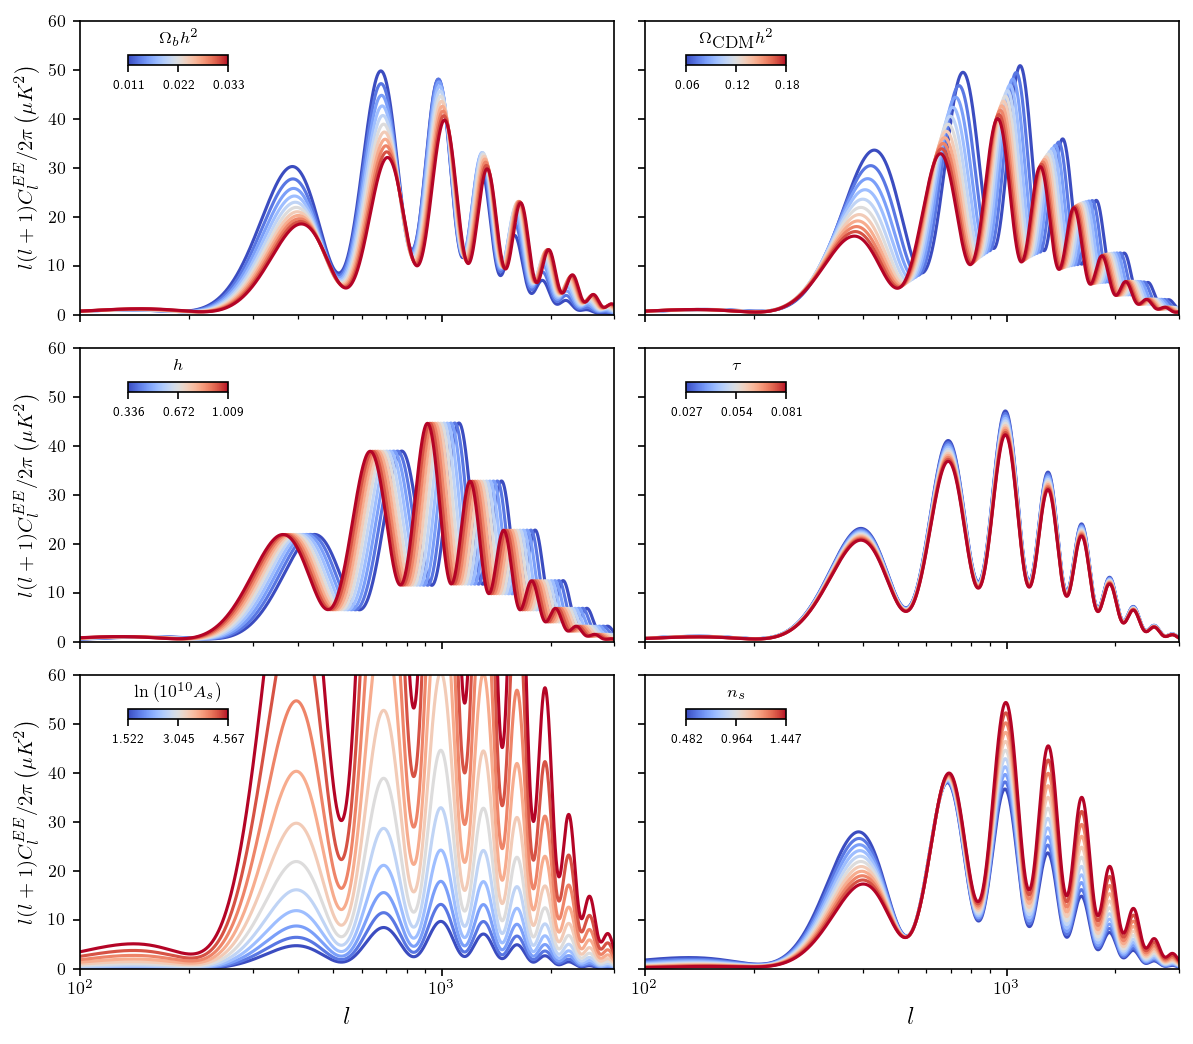

In [136]:
param_vars_plots(data_cl, 0, 2, func_cl, 
                 xlabel = r"$l$", 
                 ylabel = r"$l(l+1)C^{EE}_l/2\pi \left(\mu K^2\right)$",
                 xlog = True,
                 xlims = [1e2,3e3],
                 ylims = [0,6e1])

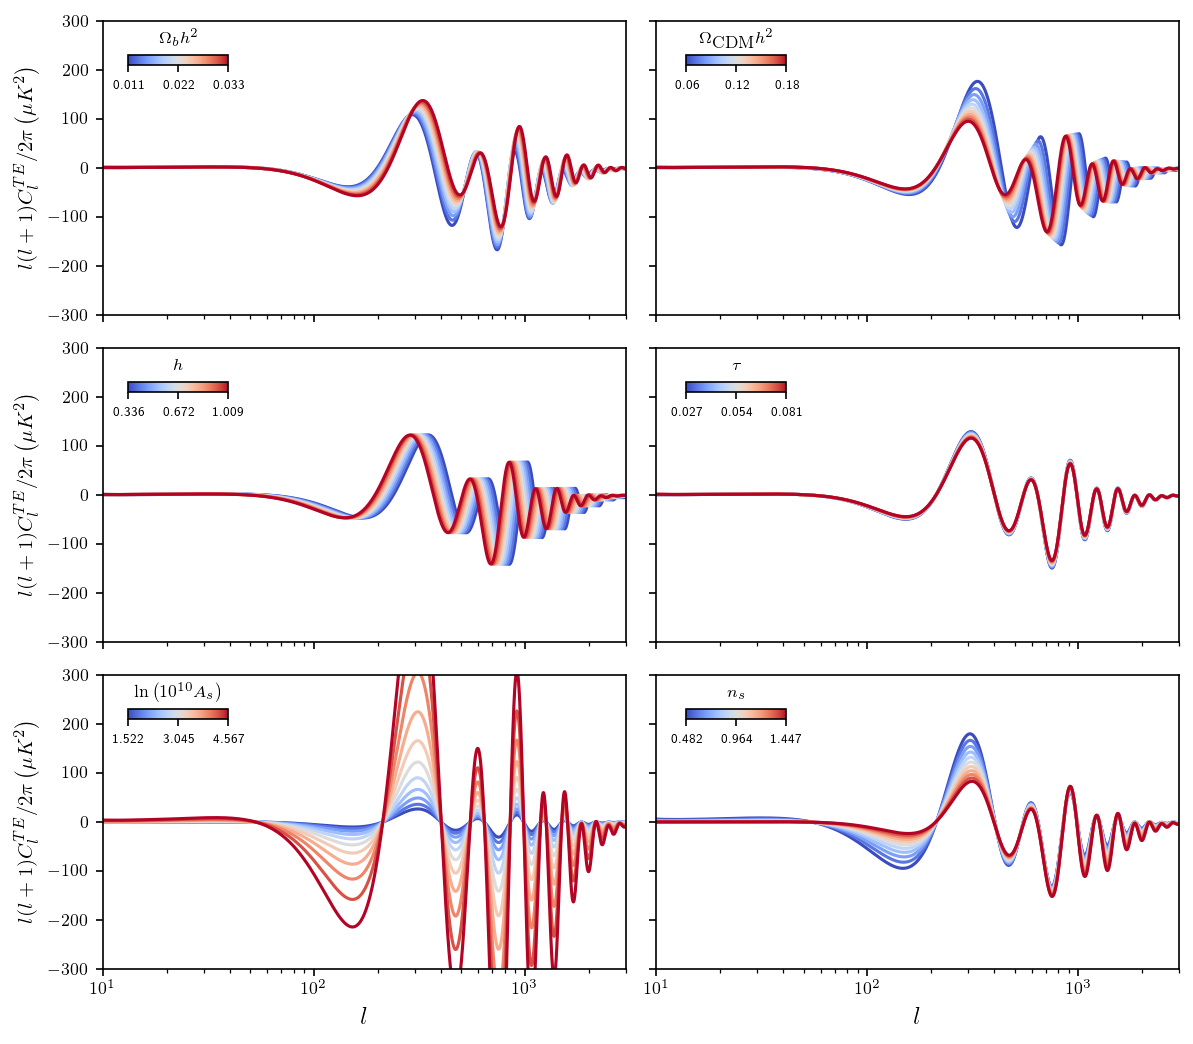

In [145]:
param_vars_plots(data_cl, 0, 3, func_cl, 
                 xlabel = r"$l$", 
                 ylabel = r"$l(l+1)C^{TE}_l/2\pi \left(\mu K^2\right)$",
                 xlog = True,
                 xlims = [1e1,3e3],
                 ylims = [-3e2,3e2])

# Matter power spectrum

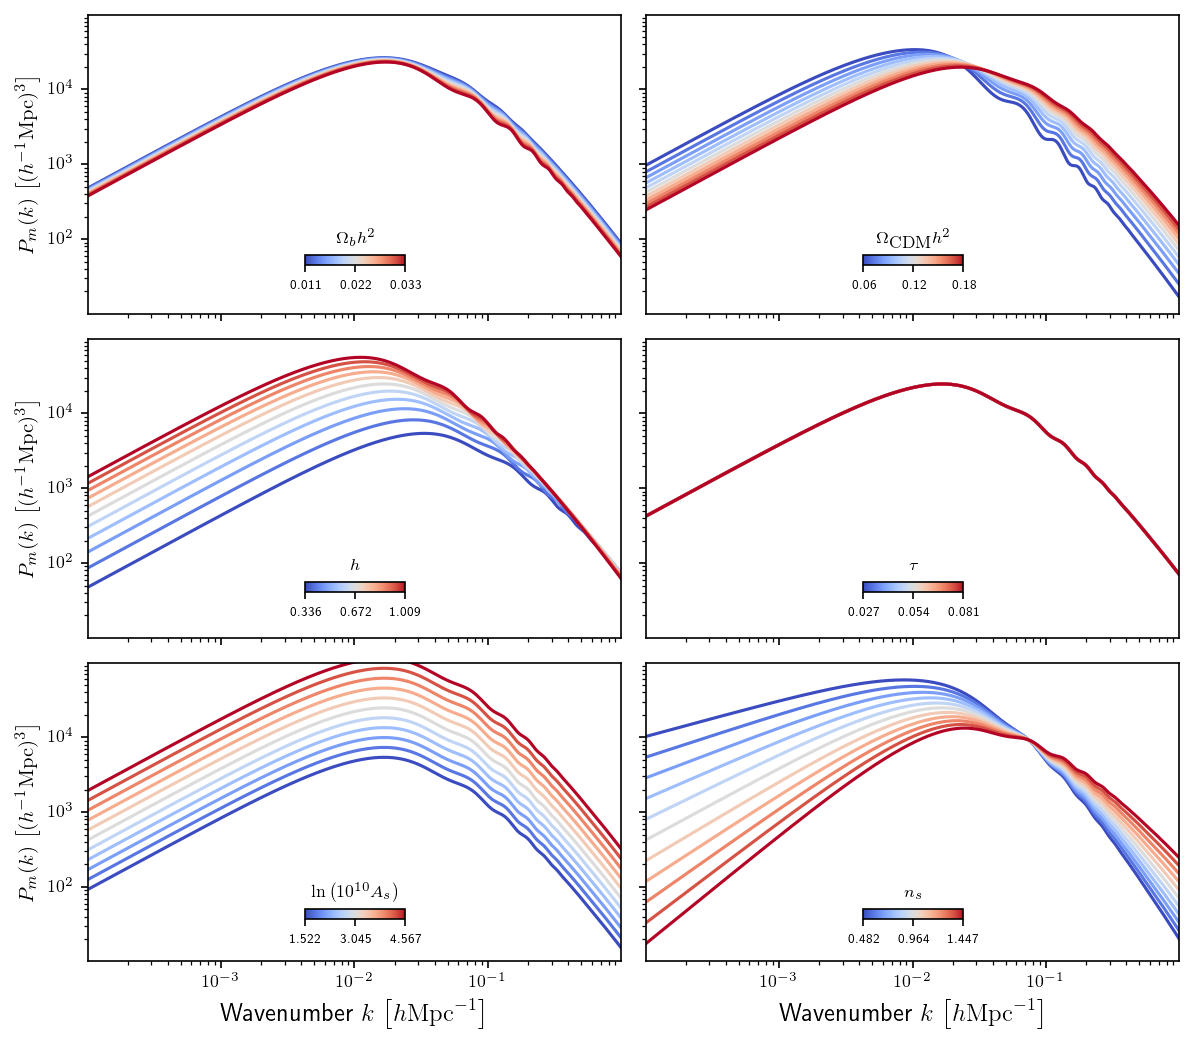

In [128]:
param_vars_plots(data_pk, 0, 1, nofunc, 
                 xlabel = r"Wavenumber $k$ $\left[h \rm{Mpc}^{-1}\right]$", 
                 ylabel = r"$P_m(k)$ $\left[(h^{-1} \rm{Mpc})^{3}\right]$",
                 xlog = True,
                 ylog = True,
                 xlims = [1e-4 + 1e-6, 1e0 - 1e-2],
                 ylims = [1e1 + 1e-1,1e5 - 1e3],
                 cbar_coords=[177,200])

# Distance modulus

C:\Users\tu_rk\AppData\Local\Temp\ipykernel_10752\1006832520.py:2: RuntimeWarning: divide by zero encountered in log10
  return 5*np.log10(dl)+25
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_10752\1006832520.py:2: RuntimeWarning: divide by zero encountered in log10
  return 5*np.log10(dl)+25
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_10752\1006832520.py:2: RuntimeWarning: divide by zero encountered in log10
  return 5*np.log10(dl)+25
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_10752\1006832520.py:2: RuntimeWarning: divide by zero encountered in log10
  return 5*np.log10(dl)+25
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_10752\1006832520.py:2: RuntimeWarning: divide by zero encountered in log10
  return 5*np.log10(dl)+25
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_10752\1006832520.py:2: RuntimeWarning: divide by zero encountered in log10
  return 5*np.log10(dl)+25
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_10752\1006832520.py:2: RuntimeWarning: divide by zero encountered in log10
  ret

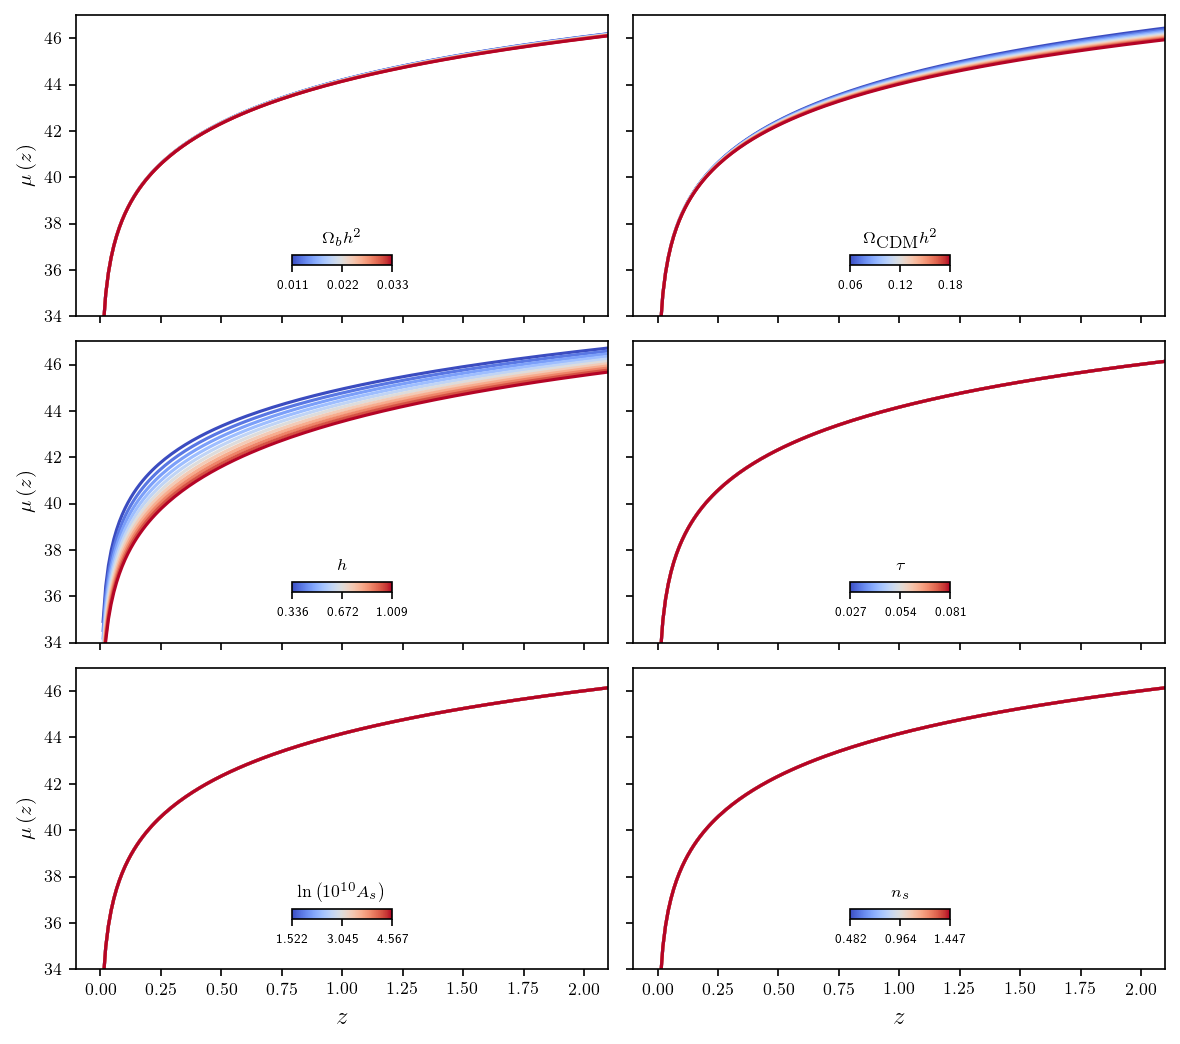

In [129]:
def mu_func(dl):
    return 5*np.log10(dl)+25

param_vars_plots(data_bg, 0, 6, mu_func, 
                 xlabel = r"$z$", 
                 ylabel = r"$\mu\left(z\right)$",
                 xlims = [-0.1,2.1],
                 ylims = [34,47],
                 cbar_coords=[177,200])

C:\Users\tu_rk\AppData\Local\Temp\ipykernel_10752\3059127379.py:9: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, color = scalarMap.to_rgba(mults[i-n_vars*no_param]));
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_10752\3059127379.py:9: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, color = scalarMap.to_rgba(mults[i-n_vars*no_param]));
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_10752\3059127379.py:9: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, color = scalarMap.to_rgba(mults[i-n_vars*no_param]));
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_10752\3059127379.py:9: RuntimeWarning: divide by zero encountered in log10
  ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, color = scalarMap.to_rgba(mults[i-n_vars*no_param]));
C:\Users\tu_rk\AppData\Local\Temp\ipykernel_10752\3059127379.py:9: RuntimeWarning: divid

Text(0, 0.5, '$\\mu\\left(z\\right)$')

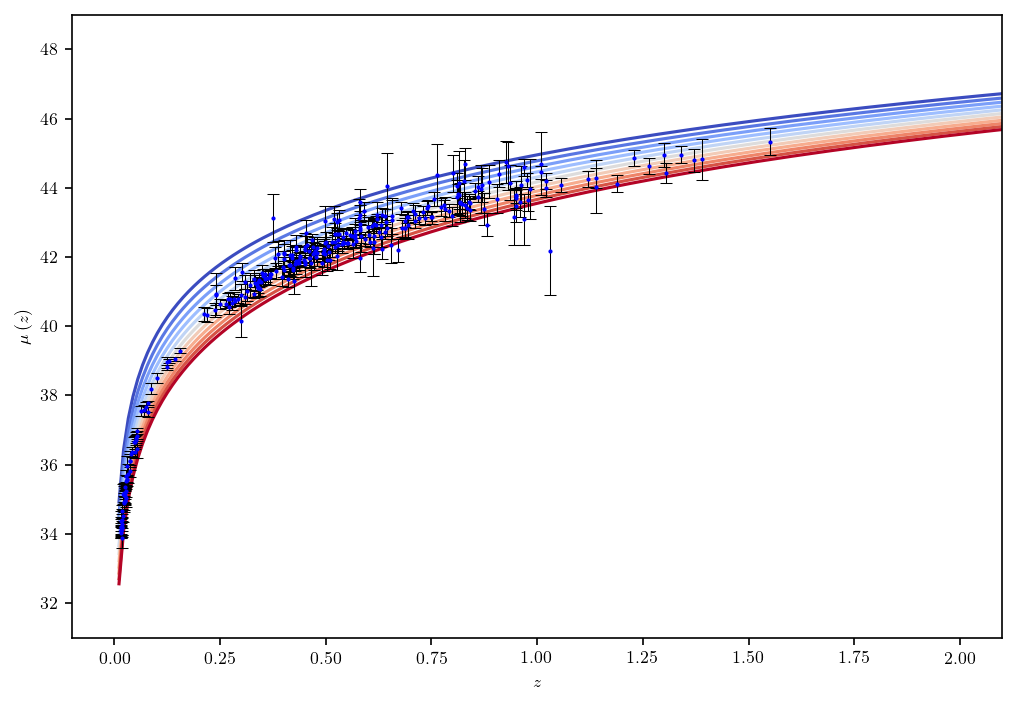

In [130]:
df_mu = pd.read_csv("mu.csv")
z_exp = np.array(df_mu["z"])
mu_exp = np.array(df_mu["mu"])
error_exp = np.array(df_mu["error"])
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

no_param = 2
for i in range(n_vars*no_param,n_vars*(no_param+1)):
    ax.plot(data_bg[i][0], 5*np.log10(data_bg[i][6])+25, color = scalarMap.to_rgba(mults[i-n_vars*no_param]));
ax.errorbar(z_exp,mu_exp,yerr=error_exp,fmt='.',elinewidth=0.5,capthick=0.5,capsize=3,ecolor="k",color="b",ms=2,label=r"Experimental")

ax.set_ylim(31,49)
ax.set_xlim(-0.1,2.1)

#plt.xscale("log")
#plt.yscale("log")

#ax.grid()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\mu\left(z\right)$")
#ax.set_title(r"Density parameters as functions of $z$")
#plt.savefig("12.mulcdm.png")